##Data Generation

In [37]:
import numpy as np



numData = 100
x_1 = np.random.uniform(1, 10, numData)
offset = np.random.uniform(0, 4, numData)
x_2 = x_1 + offset

y = [1 if x_2[i] > (x_1[i]+2) else 0 for i in xrange(len(x_1)) ]


##Data Visualization

Populating the interactive namespace from numpy and matplotlib
52 48


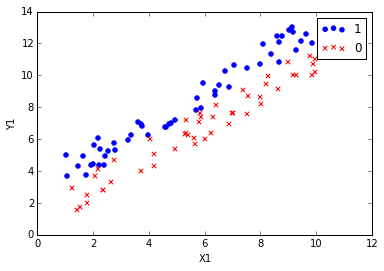

In [40]:
import matplotlib.pyplot as plt
% pylab inline 

pos = [i for i in xrange(len(y)) if y[i] == 1]
neg = [i for i in xrange(len(y)) if y[i] == 0]

print len(pos), len(neg)

plt.scatter(x_1[pos], x_2[pos], marker = 'o', color='b')
plt.scatter(x_1[neg], x_2[neg], marker = 'x', color='r')

plt.xlabel('X1')
plt.ylabel('Y1')
plt.legend(['1', '0'])

##Model Define

In [61]:
######################
#http://aimotion.blogspot.kr/2011/11/machine-learning-with-python-logistic.html


def sigmoid(X):
    '''Compute the sigmoid function '''
    #d = zeros(shape=(X.shape))

    den = 1.0 + e ** (-1.0 * X)

    d = 1.0 / den

    return d


def compute_cost(theta,X,y): #computes cost given predicted and actual values
    m = X.shape[0] #number of training examples
    theta = reshape(theta,(len(theta),1))

    #y = reshape(y,(len(y),1))
    
    J = (1./m) * (-transpose(y).dot(log(sigmoid(X.dot(theta)))) - transpose(1-y).dot(log(1-sigmoid(X.dot(theta)))))
    
    grad = transpose((1./m)*transpose(sigmoid(X.dot(theta)) - y).dot(X))
    #optimize.fmin expects a single value, so cannot return grad
    return J[0][0]#,grad


def compute_grad(theta, X, y):
    m = X.shape[0]
    
    #print theta.shape

    theta.shape = (1, 3)

    grad = zeros(3)

    h = sigmoid(X.dot(theta.T))

    delta = h - y

    l = grad.size

    for i in range(l):
        sumdelta = delta.T.dot(X[:, i])
        grad[i] = (1.0 / m) * sumdelta * - 1

    theta.shape = (3,)

    return  grad

def predict(theta, X):
    '''Predict whether the label
    is 0 or 1 using learned logistic
    regression parameters '''
    m, n = X.shape
    p = zeros(shape=(m, 1))

    h = sigmoid(X.dot(theta.T))

    for it in range(0, h.shape[0]):
        if h[it] > 0.5:
            p[it, 0] = 1
        else:
            p[it, 0] = 0

    return p

In [64]:
bias = np.ones(numData)
data = np.vstack([bias,x_1, x_2]).T
print data.shape
y = np.reshape(y, [numData, 1])
print y.shape

(100, 3)
(100, 1)


##Parameter Learning

In [91]:
theta = np.zeros(3)
alpha = 0.001
numIter = 100

cost_his = []
theta_his = []

for i in xrange(numIter):
    cost = compute_cost(theta, data, y)
    grad = compute_grad(theta, data, y)
    theta = theta + 0.1 * grad
    cost_his.append(cost)
    theta_his.append(theta)


##Visualization-h(x)

[-0.25762368 -1.1113398   0.9384975 ]


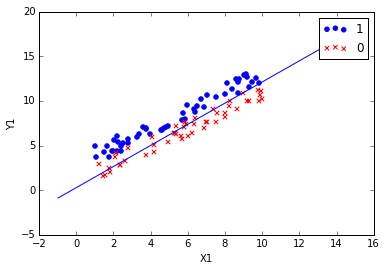

In [93]:
from __future__ import print_function
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets

@interact (bar_idx=(0,numIter))
def viz(bar_idx):
    
    plt.scatter(x_1[pos], x_2[pos], marker = 'o', color='b')
    plt.scatter(x_1[neg], x_2[neg], marker = 'x', color='r')

    plt.xlabel('X1')
    plt.ylabel('Y1')
    plt.legend(['1', '0'])
    
    plot_x = array([min(data[:, 1]) - 2, max(data[:, 2]) + 2])
    plot_y = (- 1.0 / theta_his[bar_idx][2]) * (theta_his[bar_idx][1] * plot_x + theta_his[bar_idx][0])
    plt.plot(plot_x, plot_y)
    
    print (theta_his[bar_idx])
    #plt.legend(['Decision Boundary', 'Not admitted', 'Admitted'])